# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.2.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [110]:
movies = pd.read_csv("C:\\Users\\jimmc\\Documents\\UCSD_Bootcamp\\mec-mini-projects\\mec-5.3.10-data-wranging-with-pandas-mini-project\\titles.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [111]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [112]:
cast = pd.read_csv("C:\\Users\\jimmc\\Documents\\UCSD_Bootcamp\\mec-mini-projects\\mec-5.3.10-data-wranging-with-pandas-mini-project\\cast.csv.zip")
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [113]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [114]:
release_dates = pd.read_csv("C:\\Users\\jimmc\\Documents\\UCSD_Bootcamp\\mec-mini-projects\\mec-5.3.10-data-wranging-with-pandas-mini-project\\release_dates.csv", parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [115]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [116]:
len(movies)

244914

### List all Batman movies ever made

In [117]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [118]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [119]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [120]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_potter_df.sort_values(by=['year'], ascending=True)

,title,year
223087,Harry Potter and the Sorcerer's Stone,2001
82791,Harry Potter and the Chamber of Secrets,2002
61957,Harry Potter and the Prisoner of Azkaban,2004
187926,Harry Potter and the Goblet of Fire,2005
50581,Harry Potter and the Order of the Phoenix,2007
109213,Harry Potter and the Half-Blood Prince,2009
152831,Harry Potter and the Deathly Hallows: Part 1,2010
143147,Harry Potter and the Deathly Hallows: Part 2,2011


### How many movies were made in the year 2017?

In [121]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [18]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [17]:
len(movies[(movies.year >= 2000) & ((movies.year <= 2018))])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
len(movies[movies.title.str.contains('Hamlet', case=False)])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [26]:
hamlet_movies = movies[movies.title.str.contains('Hamlet', case=False) & (movies.year >= 2000)].sort_values(by=['year'],ascending=True)
hamlet_movies
#print(len(hamlet_movies))

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [40]:
len(cast[(cast.title == 'Inception') & cast['n'].isnull()])
#len(cast[(cast.title == 'Inception')])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [41]:
len(cast[(cast.title == 'Inception') & cast['n'].notnull()])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [44]:
cast[(cast.title == 'Inception') & cast['n'].notnull()].sort_values(by='n', ascending=True).head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [57]:

print('List of movies with a character Albus Dumbledore\n')
movies = cast[cast.character.str.contains('Albus Dumbledore', case=False)].sort_values(by='year', ascending=True)['title'].values.tolist()
for movie in movies:
    print(movie)

List of movies with a character Albus Dumbledore

Harry Potter and the Sorcerer's Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Epic Movie
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows: Part 1
Harry Potter and the Deathly Hallows: Part 1
Harry Potter and the Deathly Hallows: Part 2
Ultimate Hero Project
Potter


In [61]:
print('List of Actors that Played Albus Dumbledore\n')
actors = set(cast[cast.character.str.contains('Albus Dumbledore', case=False)]['name'].values.tolist())
for actor in actors:
    print(actor)

List of Actors that Played Albus Dumbledore

George (X) O'Connor
Timothy Tedmanson
Dane Farwell
Michael Gambon
Richard Harris
Toby Regbo


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [66]:
num = len(cast[cast.name.str.contains('Keanu Reeves', case=False)])
print(f'Number of movies Keanu Reeves has starred is {num}')

Number of movies Keanu Reeves has starred is 62


In [70]:
tot = len(cast[cast.name.str.contains('Keanu Reeves', case=False) & (cast.year >= 1999)])
print(f'Keanu Reeves has starred in {tot} movies since 1999')
#cast[cast.name.str.contains('Keanu Reeves', case=False) & (cast.year >= 1999)]

Keanu Reeves has starred in 35 movies since 1999


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [84]:
cnt = len(cast[((cast.type == 'actor') |  (cast.type == 'actress')) & (cast.year >= 1950) & (cast.year <= 1960)]) 
print(f'Total roles from 1950 to 1960 = {cnt}')

Total roles from 1950 to 1960 = 234635


In [85]:
cnt = len(cast[((cast.type == 'actor') |  (cast.type == 'actress')) & (cast.year >= 2007) & (cast.year <= 2017)]) 
print(f'Total roles from 2007 to 2017 = {cnt}')

Total roles from 2007 to 2017 = 1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [257]:
tot = len(cast[cast['n'] == 1 & (cast.year >= 2000)].sort_values(by='year', ascending = True))
print(f'The number of leading roles since 2000 is {tot}')

The number of leading roles since 2000 is 60568


In [258]:
tot = len(cast[cast['n'] > 1 & (cast['n'].notnull()) & (cast.year >= 2000)].sort_values(by='year', ascending = True))
print(f'The number of non-leading roles (exclude support cast) since 2000 is {tot}')

The number of non-leading roles (exclude support cast) since 2000 is 2267035


In [107]:
tot = len(cast[cast['n'].isnull() & (cast.year >= 2000)].sort_values(by='year', ascending = True))
print(f'The number of support\extra roles since 2000 is {tot}')

The number of support\extra roles since 2000 is 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [122]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Honeymoon               11
The Three Musketeers    11
Othello                 11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

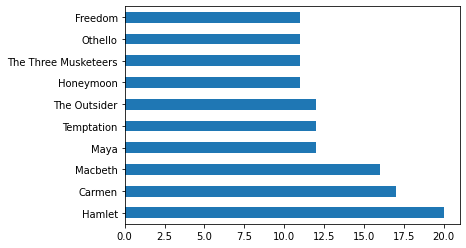

In [123]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [127]:
top_3 = movies[movies.year >= 2000].year.value_counts()[:3]
top_3

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [139]:
movies['Decade'] = movies['year'] - (movies['year'] % 10)

In [149]:
movies[['year','Decade']][movies.Decade == 2110]

,year,Decade
78061,2115,2110


<AxesSubplot:>

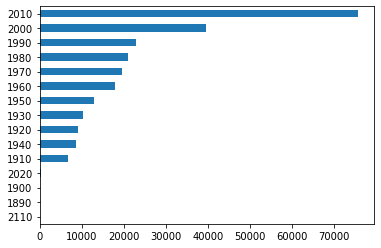

In [153]:
decade_count = movies.Decade.value_counts().sort_values()
decade_count.plot(kind = 'barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [159]:
'''
0   title      object 
1   year       int64  
2   name       object 
3   type       object 
4   character  object 
5   n          float64
'''
cast.character.value_counts().sort_values(ascending=False)[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [163]:
cast[['name','character']][cast.character == 'Herself'].value_counts()[:10]

name                    character
Queen Elizabeth II      Herself      12
Joyce Brothers          Herself       9
Luisa Horga             Herself       9
Mar?a Luisa (V) Mart?n  Herself       9
Hillary Clinton         Herself       8
Margaret Thatcher       Herself       8
In?s J. Southern        Herself       6
Marta Berrocal          Herself       6
Oprah Winfrey           Herself       6
Marilyn Monroe          Herself       6
dtype: int64

In [164]:
cast[['name','character']][cast.character == 'Himself'].value_counts()[:10]

name                   character
Adolf Hitler           Himself      99
Richard Nixon          Himself      44
Ronald Reagan          Himself      41
John F. Kennedy        Himself      37
George W. Bush         Himself      25
Winston Churchill      Himself      24
Martin Luther King     Himself      23
Bill Clinton           Himself      22
Ron Jeremy             Himself      22
Franklin D. Roosevelt  Himself      21
dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [169]:
cast['character'][cast.character.str.startswith('Zombie')].value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [170]:
cast['character'][cast.character.str.startswith('Police')].value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [177]:
cast[['year', 'name']][cast.name == 'Keanu Reeves'].value_counts().sort_values()

year  name        
2019  Keanu Reeves    1
1994  Keanu Reeves    1
2009  Keanu Reeves    1
2010  Keanu Reeves    1
2012  Keanu Reeves    1
1985  Keanu Reeves    1
2014  Keanu Reeves    1
2015  Keanu Reeves    1
2018  Keanu Reeves    1
1992  Keanu Reeves    1
1989  Keanu Reeves    2
1990  Keanu Reeves    2
1995  Keanu Reeves    2
1996  Keanu Reeves    2
2013  Keanu Reeves    2
2006  Keanu Reeves    2
2008  Keanu Reeves    2
2001  Keanu Reeves    2
1997  Keanu Reeves    2
1999  Keanu Reeves    3
1986  Keanu Reeves    3
2003  Keanu Reeves    3
2005  Keanu Reeves    3
2017  Keanu Reeves    3
1991  Keanu Reeves    3
2000  Keanu Reeves    3
1993  Keanu Reeves    4
1988  Keanu Reeves    4
2016  Keanu Reeves    5
dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:>

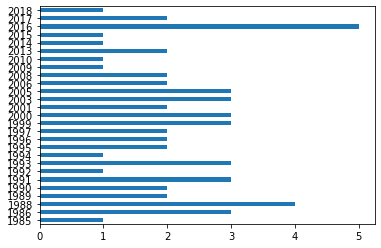

In [249]:
#kr_star_roles = cast['year'][(cast.name == 'Keanu Reeves') & (cast.n.notnull())].value_counts().sort_values()
data = cast['year'][(cast.name == 'Keanu Reeves') & (cast.n.notnull())].sort_values().value_counts(sort=False)
data.plot(kind = 'barh')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:>

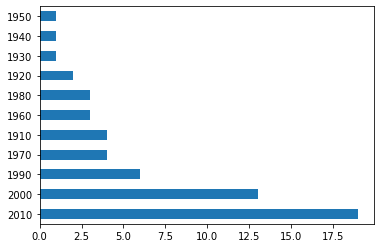

In [256]:
data = movies['Decade'][movies.title.str.contains('Hamlet', case=False)].sort_values().value_counts()
data.plot(kind = 'barh')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [264]:
leading_roles = cast['type'][(cast.n == 1) & (cast.year >= 1960) & (cast.year < 1970)].value_counts()
leading_roles

actor      8320
actress    3503
Name: type, dtype: int64

In [265]:
leading_roles = cast['type'][(cast.n == 1) & (cast.year >= 2000) & (cast.year < 2010)].value_counts()
leading_roles

actor      18557
actress     7787
Name: type, dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [299]:
#cast[['title','year']][cast.name == 'Frank Oz'].sort_values('year').values.tolist()
summary = cast[['title','year']][cast.name == 'Frank Oz'].groupby(by=['title','year']).size()
summary[summary > 1].sort_index(level=1)

title                                 year
The Muppet Movie                      1979    8
An American Werewolf in London        1981    2
The Great Muppet Caper                1981    6
The Dark Crystal                      1982    2
The Muppets Take Manhattan            1984    7
Follow That Bird                      1985    3
The Muppet Christmas Carol            1992    7
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
dtype: int64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [303]:
summary = cast[['character']][cast.name == 'Frank Oz'].groupby(by='character').size()  #more cleaning needed but out of time
summary[summary > 1].sort_index(level=1)

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

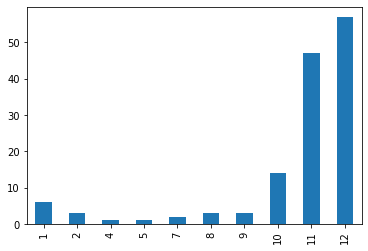

In [304]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

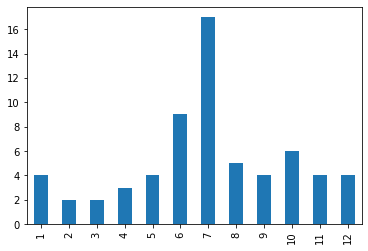

In [305]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<ipython-input-306-00cb31ad5433>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  action.date.dt.week.value_counts().sort_index().plot(kind='bar')


<AxesSubplot:>

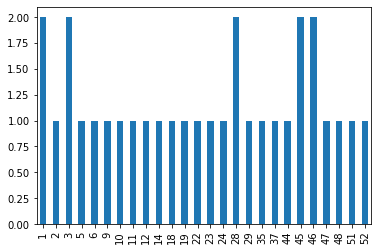

In [306]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [318]:
release_dates['year'] = release_dates['date'].dt.year
cast_w_release = pd.merge(cast, release_dates, how = 'inner', on = ['title','year'])
cast_w_release.head()

,title,year,name,type,character,n,country,date,year_x
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,Finland,1985-11-01,1985
1,Suuri illusioni,1985,Jack Helen Brut,actor,Guests,21.0,Finland,1985-11-01,1985
2,Suuri illusioni,1985,Risto Heikinheimo,actor,Discussing Guest,NaN,Finland,1985-11-01,1985
3,Suuri illusioni,1985,Erkki Hopf,actor,Young German,17.0,Finland,1985-11-01,1985
4,Suuri illusioni,1985,Ola Johansson,actor,German Sailor,12.0,Finland,1985-11-01,1985


In [319]:
cast_w_release[['name','title', 'date']][(cast_w_release.name == 'Keanu Reeves') & (cast_w_release.n == 1) & (cast_w_release.country == 'USA')].sort_values('date')

,name,title,date
10187580,Keanu Reeves,The Night Before,1988-04-15
5323569,Keanu Reeves,Bill & Ted's Excellent Adventure,1989-02-17
1790378,Keanu Reeves,Bill & Ted's Bogus Journey,1991-07-19
5478758,Keanu Reeves,Speed,1994-06-10
1187497,Keanu Reeves,Johnny Mnemonic,1995-05-26
6595478,Keanu Reeves,A Walk in the Clouds,1995-08-11
8301318,Keanu Reeves,Chain Reaction,1996-08-02
9015210,Keanu Reeves,Feeling Minnesota,1996-09-13
4956139,Keanu Reeves,The Devil's Advocate,1997-10-17
7905210,Keanu Reeves,The Matrix,1999-03-31


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

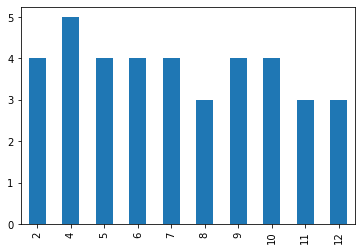

In [324]:
kr_months = cast_w_release[(cast_w_release.name == 'Keanu Reeves') &  (cast_w_release.country == 'USA')]
mons = kr_months.date.dt.month.value_counts().sort_index()
mons[mons > 2].plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

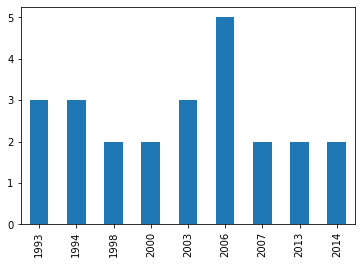

In [323]:
IM_months = cast_w_release[(cast_w_release.name == 'Ian McKellen') &  (cast_w_release.country == 'USA')]
vals = IM_months.date.dt.year.value_counts().sort_index()
vals[vals>1].plot(kind='bar')